### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

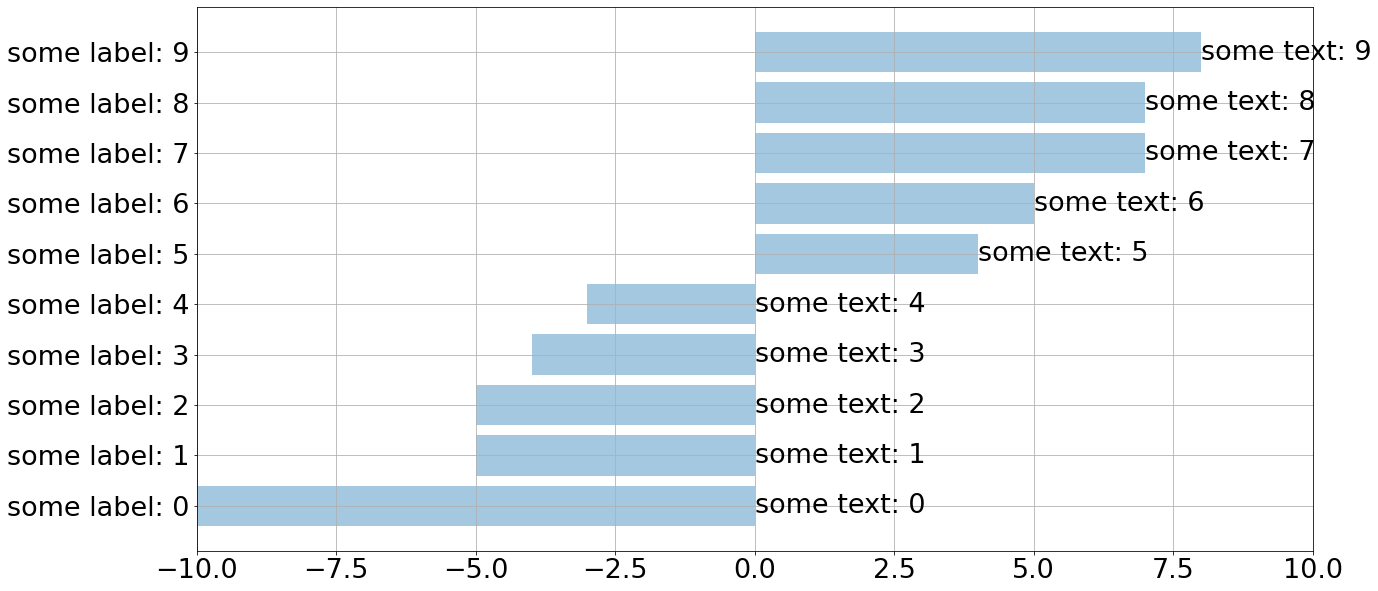

In [54]:
# Сигнатура функции и пример вывода:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)


def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    plt.figure(figsize=figsize)
    plt.xlim(-10, 10)
    plt.barh([i for i in range(0, 10)], width=bars_length, alpha=0.4)
    for i in range(10):
        plt.annotate(labels[i], xy=((bars_length[i]+abs(bars_length[i]))/2,i-0.15), size=27)
    ax=plt.gca()
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_yticks(np.arange(10))
    ax.set_yticklabels(yticks_labels)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(27)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(27)
    plt.grid(True)
    plt.show()
                                 
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

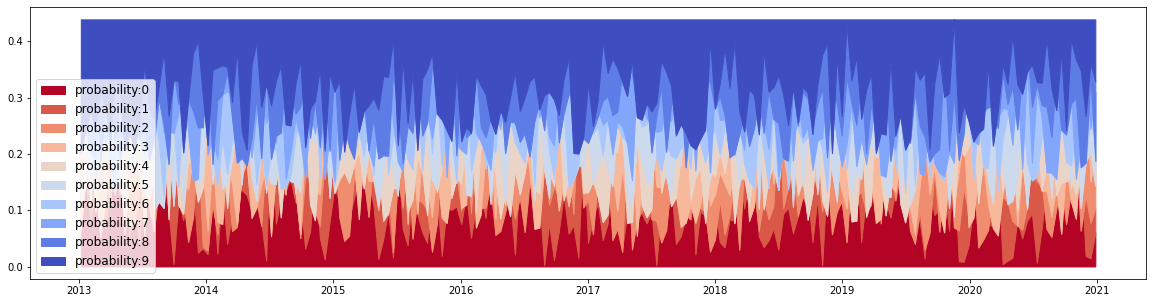

In [303]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)


def plot_time_probabilities(probabilities_in_time, figsize):
    color = [[180,4,38],
             [217,88,71],
             [241,141,111],
             [247,184,156],
             [234,212,200],
             [205,217,236],
             [170,199,253],
             [130,166,251],
             [94,124,230],
             [62,78,192]]

    plt.figure(figsize=figsize).gca()
    probabilities_in_time[0]=[float(min([min(probabilities_in_time[j]) for j in range(0, 10)])) for e in range(len(dti))]   
    probabilities_in_time[10]=[float(max([max(probabilities_in_time[j]) for j in range(0, 10)])) for e in range(len(dti))]   

    for i in range(1, 11):
        if i<10:
            probabilities_in_time[i+1] += 0.025*i
        else:
            probabilities_in_time[10]=[float(max([max(probabilities_in_time[j]) for j in range(0, 10)])) for e in range(len(dti))]
        plt.fill_between(probabilities_in_time.index, probabilities_in_time[i-1], probabilities_in_time[i], color=(float(color[i-1][0])/255,float(color[i-1][1])/255,float(color[i-1][2])/255), label='probability:{}'. format(i-1))
        plt.legend(prop={'size': 12}, loc='lower left') 
plot_time_probabilities(probabilities_in_time, figsize)



### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

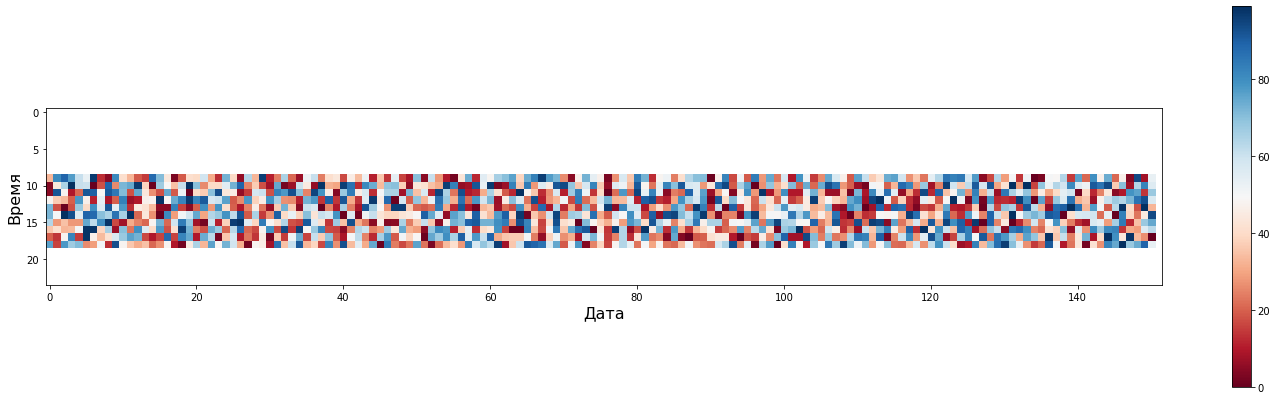

In [400]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)

def plot_intraday_ts(intraday_ts, figsize):
    plt.figure(figsize= figsize)
    db=pd.DataFrame({'Time':intraday_ts.index.time, 'Date':intraday_ts.index.date, 'Density':intraday_ts.to_frame()[0]})
    plt.imshow(db.pivot(index='Time', columns='Date', values='Density'), cmap='RdBu')
    plt.colorbar()
    plt.xlabel('Дата', fontsize=16)
    plt.ylabel('Время', fontsize=16)
    
     
plot_intraday_ts(intraday_ts, figsize)
